In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In C:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

## Import data sets into dataframes and plot time series

#### Flow data at 60min resolution

Import data into Pandas dataframe

In [2]:
%%time
flow60 = pd.read_excel('Shipston Wiski data - 60 min.xlsx', 
                      sheet_name = 1)

Wall time: 1min 19s


Explore data (5 top rows) 

In [3]:
flow60.head()

,Date,Time,Flow [m³/s],Quality,Interpolation,Tags,Remarks
0,1986-01-08,14:00:00,5.73,200 (U),linear interpolation,NaN,NaN
1,1986-01-08,15:00:00,5.85,200 (U),linear interpolation,NaN,NaN
2,1986-01-08,16:00:00,5.97,200 (U),linear interpolation,NaN,NaN
3,1986-01-08,17:00:00,6.09,200 (U),linear interpolation,NaN,NaN
4,1986-01-08,18:00:00,6.18,200 (U),linear interpolation,NaN,NaN


Replace missing values to NaNs (to avoid plotting errors)

In [4]:
flow60_filtered = flow60.replace(" ---","NaN")

Print dates with missing values

In [5]:
print(flow60['Date'][flow60['Quality']=='missing'].unique())

['1987-02-11T00:00:00.000000000' '1987-02-12T00:00:00.000000000'
 '1987-02-13T00:00:00.000000000' '1987-02-14T00:00:00.000000000'
 '1987-02-15T00:00:00.000000000' '1987-02-16T00:00:00.000000000'
 '1987-02-17T00:00:00.000000000' '1987-02-18T00:00:00.000000000'
 '1987-03-25T00:00:00.000000000' '1987-03-26T00:00:00.000000000'
 '1987-03-27T00:00:00.000000000' '1987-03-28T00:00:00.000000000'
 '1987-03-29T00:00:00.000000000' '1987-03-30T00:00:00.000000000'
 '1987-03-31T00:00:00.000000000' '1987-04-01T00:00:00.000000000']


Plot flow time series

Text(0.5, 1.0, 'Flow (m3/s)')

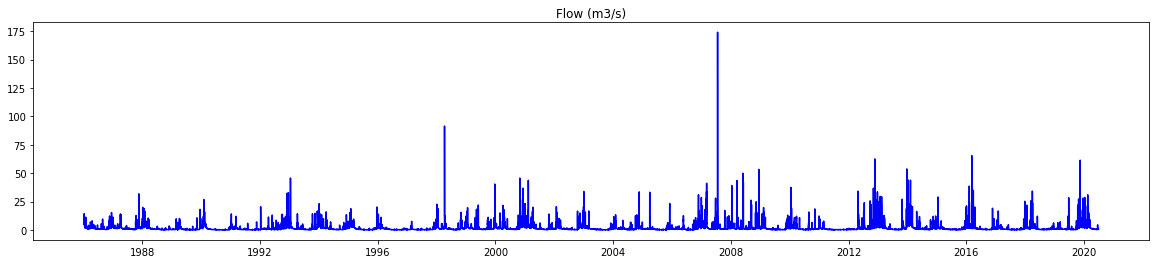

In [6]:
plt.figure(figsize=(20,4))
plt.plot(flow60_filtered['Date'],flow60_filtered['Flow [m³/s]'], 'blue')
plt.title("Flow (m3/s)")

#### Stage data at 60min resolution

Import data from Excel spreadsheet into a Pandas dataframe

In [7]:
%%time
stage60 = pd.read_excel('Shipston Wiski data - 60 min.xlsx', 
                      sheet_name = 2)

Wall time: 1min 21s


Replace missing values to NaNs (to avoid plotting errors)

In [8]:
stage60_filtered = stage60.replace(" ---","NaN")

Print dates with missing values

In [9]:
print(stage60['Date'][stage60['Quality']=='missing'].unique())

['1974-01-29T00:00:00.000000000' '1974-01-30T00:00:00.000000000'
 '1974-01-31T00:00:00.000000000' '1974-02-01T00:00:00.000000000'
 '1974-02-02T00:00:00.000000000' '1974-02-03T00:00:00.000000000'
 '1974-02-04T00:00:00.000000000' '1974-02-05T00:00:00.000000000'
 '1974-02-06T00:00:00.000000000' '1974-02-07T00:00:00.000000000'
 '1974-02-08T00:00:00.000000000' '1974-02-09T00:00:00.000000000'
 '1974-02-10T00:00:00.000000000' '1974-02-11T00:00:00.000000000'
 '1974-02-12T00:00:00.000000000' '1974-02-13T00:00:00.000000000'
 '1974-02-14T00:00:00.000000000' '1974-02-15T00:00:00.000000000'
 '1974-02-16T00:00:00.000000000' '1974-02-17T00:00:00.000000000'
 '1974-02-18T00:00:00.000000000' '1974-02-19T00:00:00.000000000'
 '1974-02-20T00:00:00.000000000' '1974-02-21T00:00:00.000000000'
 '1974-02-22T00:00:00.000000000' '1974-02-23T00:00:00.000000000'
 '1974-02-24T00:00:00.000000000' '1974-03-09T00:00:00.000000000'
 '1974-03-10T00:00:00.000000000' '1974-03-11T00:00:00.000000000'
 '1974-03-12T00:00:00.000

Plot stage time series

Text(0.5, 1.0, 'Stage (m)')

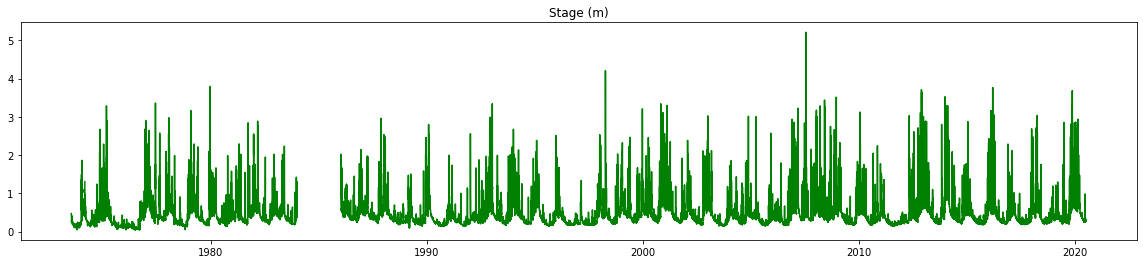

In [10]:
plt.figure(figsize=(20,4))
plt.plot(stage60_filtered['Date'],stage60_filtered['Stage [m]'], 'green')
plt.title("Stage (m)")

#### Shipston rainfall data at 60min resolution

Import data into a Pandas dataframe

In [11]:
%%time
rainfall60 = pd.read_excel('Shipston Wiski data - 60 min.xlsx', 
                      sheet_name = 3)

Wall time: 1min 21s


Explore data (5 top rows) 

In [12]:
rainfall60.head()

,Date,Time,Precipitation [mm],Quality,Interpolation,Valid,Invalid,Missing,Tags,Remarks
0,1979-07-26,09:00:00,.,40 (G),const since previous,0.0,0.0,0.0,NaN,NaN
1,1979-07-26,10:00:00,.,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
2,1979-07-26,11:00:00,.,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
3,1979-07-26,12:00:00,.,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
4,1979-07-26,13:00:00,.,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN


## Random pointers

* Intro to hydrology 
  * Beven, K. J. (2011). Rainfall-runoff modelling: the primer. John Wiley & Sons.
  * Shaw, E. M., Beven, K. J., Chappell, N. A., & Lamb, R. (2010). Hydrology in practice. CRC press. 

* Extreme value theory
  * Peaks over thresholds
  * Annual maxima

* Time series autoregressive models

* LSTMs (and CNNs) for rainfall-runoff modelling 

## Regression to fill missing data

Merge the dataframes on date and time:

In [13]:
df_flow_and_stage = pd.merge(stage60_filtered, flow60_filtered, on=['Date', 'Time']) #Merge the dataframes

df_flow_and_stage = df_flow_and_stage.rename(columns= #Renaming columns for ease of use
                                             {'Quality_x':'Quality_stage', 
                                              'Quality_y':'Quality_flow', 
                                              'Flow [m³/s]':'flow',
                                              'Stage [m]':'stage'})

df_flow_and_stage.head()

,Date,Time,stage,Quality_stage,Interpolation_x,Tags_x,Remarks_x,flow,Quality_flow,Interpolation_y,Tags_y,Remarks_y
0,1986-01-08,14:00:00,0.986,200 (U),linear interpolation,NaN,NaN,5.73,200 (U),linear interpolation,NaN,NaN
1,1986-01-08,15:00:00,1,200 (U),linear interpolation,NaN,NaN,5.85,200 (U),linear interpolation,NaN,NaN
2,1986-01-08,16:00:00,1.015,200 (U),linear interpolation,NaN,NaN,5.97,200 (U),linear interpolation,NaN,NaN
3,1986-01-08,17:00:00,1.029,200 (U),linear interpolation,NaN,NaN,6.09,200 (U),linear interpolation,NaN,NaN
4,1986-01-08,18:00:00,1.039,200 (U),linear interpolation,NaN,NaN,6.18,200 (U),linear interpolation,NaN,NaN


In [14]:
print(df_flow_and_stage['Date'][df_flow_and_stage['Quality_stage']=='missing'].unique())

['1987-02-11T00:00:00.000000000' '1987-02-12T00:00:00.000000000'
 '1987-02-13T00:00:00.000000000' '1987-02-14T00:00:00.000000000'
 '1987-02-15T00:00:00.000000000' '1987-02-16T00:00:00.000000000'
 '1987-02-17T00:00:00.000000000' '1987-02-18T00:00:00.000000000'
 '1987-03-25T00:00:00.000000000' '1987-03-26T00:00:00.000000000'
 '1987-03-27T00:00:00.000000000' '1987-03-28T00:00:00.000000000'
 '1987-03-29T00:00:00.000000000' '1987-03-30T00:00:00.000000000'
 '1987-03-31T00:00:00.000000000' '1987-04-01T00:00:00.000000000']


In [15]:
print(df_flow_and_stage['Date'][df_flow_and_stage['Quality_flow']=='missing'].unique())

['1987-02-11T00:00:00.000000000' '1987-02-12T00:00:00.000000000'
 '1987-02-13T00:00:00.000000000' '1987-02-14T00:00:00.000000000'
 '1987-02-15T00:00:00.000000000' '1987-02-16T00:00:00.000000000'
 '1987-02-17T00:00:00.000000000' '1987-02-18T00:00:00.000000000'
 '1987-03-25T00:00:00.000000000' '1987-03-26T00:00:00.000000000'
 '1987-03-27T00:00:00.000000000' '1987-03-28T00:00:00.000000000'
 '1987-03-29T00:00:00.000000000' '1987-03-30T00:00:00.000000000'
 '1987-03-31T00:00:00.000000000' '1987-04-01T00:00:00.000000000']


# Attempting to predict missing flow data from stage data:

In [16]:
#Get rid of any input pairs to the regression with missing values
df_flow_and_stage_complete = df_flow_and_stage[df_flow_and_stage['Quality_flow'] != 'missing']  
df_flow_and_stage_complete = df_flow_and_stage_complete[df_flow_and_stage_complete['Quality_flow'] != 'missing'] 


Post both sensors being installed, if one of either stage or flow data is missing then the other is also missing. There's not much missing though.

### Scatter plot Flow vs. Stage

<AxesSubplot:xlabel='stage', ylabel='flow'>

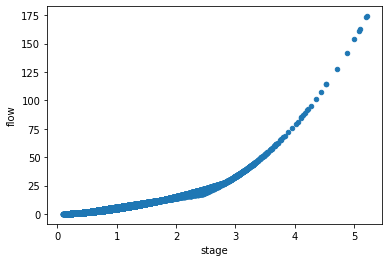

In [17]:
df_flow_and_stage_complete.plot.scatter(x='stage', y='flow')

It looks like pretty straightforward curve with a little noise at first

(15.0, 25.0)

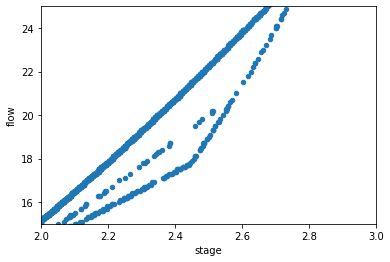

In [18]:
df_flow_and_stage_complete.plot.scatter(x='stage', y='flow')
plt.xlim([2,3])
plt.ylim([15,25])

But if we zoom in it actually looks more like a few curves on top of each other. I would imagine that this is probably because it's not exactly the same set of sensors that were used in 1974. It would probably be best to try and separate them by time slicing the data, but we'll leave it for now.

### Gaussian Process Fit

Use a Gaussian process to predict flow data from stage data - taking every 500th data point to save memory, and also including the 100 data points with the highest value, because there aren't very many in that range and most of them would get missed by only taking 1/500th of the data.

In [19]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

X = df_flow_and_stage_complete['stage'].values.reshape(-1,1)
y = df_flow_and_stage_complete['flow'].values

y = y[np.argsort(X, axis=0)] #Reorder them from time order to ascending by value
X = np.sort(X, axis=0) #So that the line plot looks sensible

X_train = np.append(X[0::500], X[-100:], axis = 0) #Every 500th data point and the last 100
y_train = np.append(y[0::500], y[-100:], axis = 0)


#Sort X_train into ascending order (for plotting)


kernel = RBF(1, (1e-2, 1e2))

gp = GaussianProcessRegressor(kernel=kernel,
                              n_restarts_optimizer=10, alpha = 0.1**2)

gp.fit(X_train, y_train)

print(gp.kernel_)

RBF(length_scale=0.712)


R^2 Score for the predictions:

(Note that this does actually include the training data too but it only makes up 1/500th~ish of the dataset, so it's probably ok, and I don't have to write code to take it out)

In [20]:
gp.score(X, y)

0.9959571302962115

In [21]:
y_pred, sigma = gp.predict(X, return_std=True)

mean_sq_err = ((y_pred - y)**2).mean()

print("RMS error in flow is: " + str(np.sqrt(mean_sq_err)) + " [m³/s]")

mean_abs_prc_err = (abs( (y_pred - y) / y) ).mean()

print("MAP error in flow is: " + str(100*mean_abs_prc_err) + "%")

RMS error in flow is: 0.17866404034377967 [m³/s]
MAP error in flow is: 6.083800714866954%


We could probably get those numbers down by separating the apparent curves in the data as above. 5% doesn't seem too awful so we can come back to it later

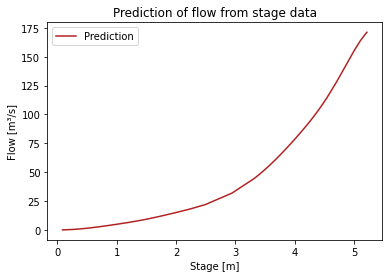

In [22]:
#Plot predictions based on the training data to avoid memory errors
y_pred_train, sigma = gp.predict(X_train, return_std=True) 

plt.figure()
plt.plot(X_train, y_pred_train, 'firebrick', label='Prediction')
#plt.scatter(X, y, marker='x', color='coral', label = 'Observations')
plt.xlabel('Stage [m]')
plt.ylabel('Flow [m³/s]')
plt.title('Prediction of flow from stage data')

plt.legend(loc='upper left')

plt.show()

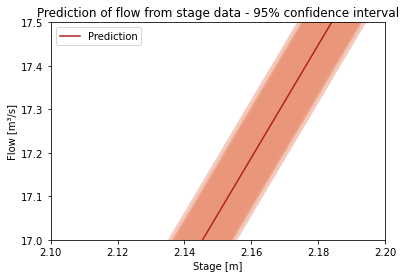

In [23]:
y_pred, sigma = gp.predict(X_train, return_std=True)

plt.figure()
#plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
#plt.errorbar(X_train.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(X_train, y_pred, 'firebrick', label='Prediction')
plt.fill(np.concatenate([X_train, X_train[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='darksalmon', ec='None')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

plt.xlabel('Stage [m]')
plt.ylabel('Flow [m³/s]')
plt.title('Prediction of flow from stage data - 95% confidence interval')

plt.legend(loc='upper left')

plt.xlim([2.1,2.2])
plt.ylim([17,17.5])

plt.show()

This looks pretty reasonable so far - try predicting the flow time series from the stage data.

C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


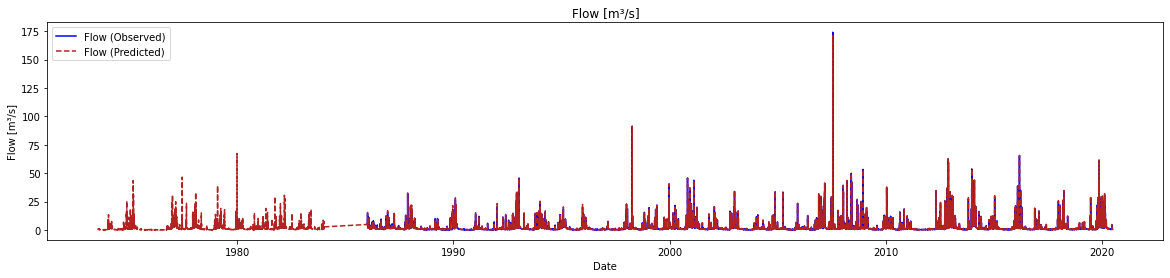

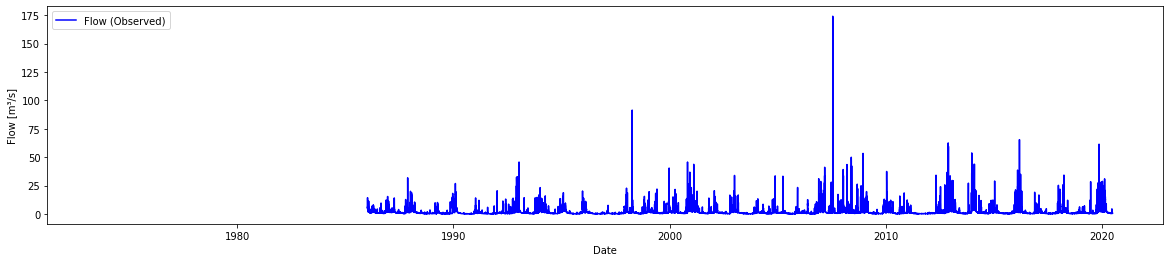

In [24]:
plt.figure(figsize=(20,4))

plt.plot(flow60_filtered['Date'],flow60_filtered['Flow [m³/s]'], 'blue', label = 'Flow (Observed)')

stage60_filtered_no_missing = stage60_filtered[stage60_filtered['Quality']!='missing'] #Remove rows with stage missing

#Predict the flow from the remaining stage values
predicted_flow = gp.predict(stage60_filtered_no_missing['Stage [m]'].values.reshape(-1,1)) 

stage60_filtered_no_missing['predicted_flow'] = predicted_flow

plt.plot(stage60_filtered_no_missing['Date'], predicted_flow, 'firebrick', label = 'Flow (Predicted)', linestyle='--')

lims = plt.xlim()

plt.title("Flow [m³/s]")
plt.xlabel('Date')
plt.ylabel('Flow [m³/s]')

plt.legend(loc='upper left')


plt.figure(figsize=(20,4))
plt.plot(flow60_filtered['Date'],flow60_filtered['Flow [m³/s]'], 'blue', label = 'Flow (Observed)')
plt.xlim(lims)

plt.xlabel('Date')
plt.ylabel('Flow [m³/s]')

plt.legend(loc='upper left')

#N.B I've not managed to get rid of the SettingWithCopyWarning which is probably fairly important but I can't be bothered 
#and I don't do much more with it so it works anyway.

(0.0, 75.0)

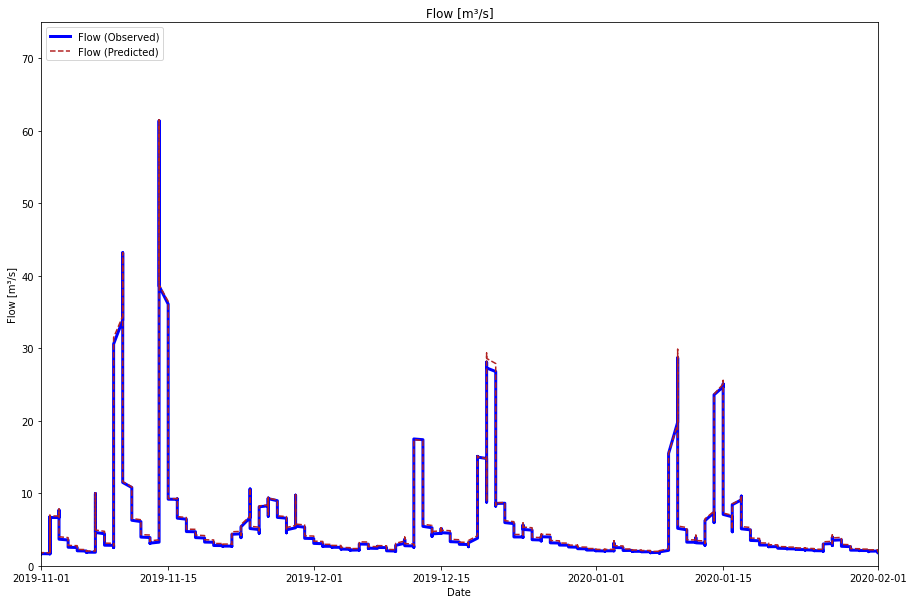

In [25]:
plt.figure(figsize=(15,10))

plt.plot(flow60_filtered['Date'],flow60_filtered['Flow [m³/s]'], 'blue', label = 'Flow (Observed)', linewidth = 3)

plt.plot(stage60_filtered_no_missing['Date'], predicted_flow, 'firebrick', label = 'Flow (Predicted)', linestyle = '--')


plt.title("Flow [m³/s]")
plt.xlabel('Date')
plt.ylabel('Flow [m³/s]')

plt.legend(loc='upper left')

plt.xlim(['2019-11-01T00:00:00.000000000','2020-02-01T00:00:00.000000000'])
plt.ylim([0,75])

### Save the predicted flow data to a new spreadsheet

In [26]:
#Merge stage60 and flow60 so that we can use the real data where it exists
stage60_filtered_no_missing = stage60_filtered_no_missing.merge(flow60_filtered[['Date','Time','Flow [m³/s]']], how='left')

stage60_filtered_no_missing = stage60_filtered_no_missing.rename(columns= #decapitalising the columns because i hate pressing shift/remove units
                                             {'Date':'date', 
                                              'Time':'time', 
                                              'Flow [m³/s]':'flow',
                                              'Stage [m]':'stage',
                                              'Quality':'quality',
                                              'Interpolation':'interpolation',
                                              'Tags':'tags',
                                              'Remarks':'remarks'})

stage60_filtered_no_missing.to_excel("flow_stage_predicted_60_minutes.xlsx")